In [23]:
import uproot
import pandas as pd

In [24]:
input_file_name = "/Users/napadula/workingdir/data/AnalysisResults.root"
event_tree_name="PWGHF_TreeCreator/tree_event_char"
event_tree = uproot.open(input_file_name)[event_tree_name]

event_df = event_tree.pandas.df(['run_number', 'ev_id', 'z_vtx_reco', 'is_ev_rej']).reset_index(drop=True)
event_df = event_df.query('is_ev_rej == 0').reset_index(drop=True)
event_df.describe()

,run_number,ev_id,z_vtx_reco,is_ev_rej
count,1.424011e+06,1.424011e+06,1.424011e+06,1424011.0
mean,2.822347e+05,3.936304e+07,7.838238e-01,0.0
std,8.952266e+01,2.743804e+07,4.614429e+00,0.0
min,2.820310e+05,3.369026e+06,-9.999956e+00,0.0
25%,2.821470e+05,1.795928e+07,-2.569331e+00,0.0
50%,2.822470e+05,4.091531e+07,9.106055e-01,0.0
75%,2.823400e+05,5.444170e+07,4.288804e+00,0.0
max,2.823430e+05,9.180255e+07,9.999999e+00,0.0


In [25]:
d0_tree_name="PWGHF_TreeCreator/tree_D0"
d0_tree = uproot.open(input_file_name)[d0_tree_name]

In [26]:
d0_tree.keys()

[b'run_number',
 b'ev_id',
 b'cand_type',
 b'inv_mass',
 b'pt_cand',
 b'pt_gen_cand',
 b'y_cand',
 b'eta_cand',
 b'phi_cand',
 b'd_len',
 b'd_len_xy',
 b'norm_dl_xy',
 b'cos_p',
 b'cos_p_xy',
 b'imp_par_xy',
 b'dca',
 b'cos_t_star',
 b'imp_par_prod',
 b'max_norm_d0d0exp',
 b'norm_dl',
 b'imp_par_prong0',
 b'imp_par_err_prong0',
 b'imp_par_prong1',
 b'imp_par_err_prong1',
 b'pt_prong0',
 b'eta_prong0',
 b'phi_prong0',
 b'p_prong0',
 b'spdhits_prong0',
 b'pt_prong1',
 b'eta_prong1',
 b'phi_prong1',
 b'p_prong1',
 b'spdhits_prong1',
 b'nsigTPC_Pi_0',
 b'nsigTPC_K_0',
 b'nsigTOF_Pi_0',
 b'nsigTOF_K_0',
 b'nsigTPC_Pi_1',
 b'nsigTPC_K_1',
 b'nsigTOF_Pi_1',
 b'nsigTOF_K_1']

In [27]:
d0_df = d0_tree.pandas.df()
d0_df = pd.merge(d0_df, event_df, on=['run_number', 'ev_id'])

In [49]:
d0_df.describe()

,run_number,ev_id,cand_type,inv_mass,pt_cand,pt_gen_cand,y_cand,eta_cand,phi_cand,d_len,...,nsigTPC_Pi_0,nsigTPC_K_0,nsigTOF_Pi_0,nsigTOF_K_0,nsigTPC_Pi_1,nsigTPC_K_1,nsigTOF_Pi_1,nsigTOF_K_1,z_vtx_reco,is_ev_rej
count,3.197240e+06,3.197240e+06,3.197240e+06,3.197240e+06,3.197240e+06,3197240.0,3.197240e+06,3.197240e+06,3.197240e+06,3.197240e+06,...,3.197240e+06,3.197240e+06,3.197240e+06,3.197240e+06,3.197240e+06,3.197240e+06,3.197240e+06,3.197240e+06,3.197240e+06,3197240.0
mean,2.822347e+05,3.932070e+07,4.181952e+06,1.791917e+00,1.329740e+00,-99.0,3.962916e-03,8.596810e-03,3.148825e+00,1.589916e-01,...,9.427158e-01,-1.402899e+00,-4.390078e+02,-4.488321e+02,4.624821e-01,-1.796700e+00,-4.515736e+02,-4.611545e+02,9.521500e-01,0.0
std,8.942346e+01,2.747043e+07,4.006602e+06,1.883087e-01,8.913022e-01,0.0,3.130392e-01,6.965144e-01,1.823892e+00,3.736982e-01,...,2.124271e+01,2.026380e+01,5.074812e+02,4.967728e+02,2.377497e+01,2.346998e+01,5.065156e+02,4.963292e+02,4.589861e+00,0.0
min,2.820310e+05,3.369026e+06,0.000000e+00,1.464840e+00,2.249774e-03,-99.0,-8.414752e-01,-6.161968e+00,4.627001e-06,1.086060e-04,...,-9.990000e+02,-9.990000e+02,-2.642635e+03,-2.496057e+03,-9.990000e+02,-9.990000e+02,-2.064771e+03,-2.066226e+03,-9.999379e+00,0.0
25%,2.821470e+05,1.795940e+07,2.560000e+02,1.634669e+00,7.213005e-01,-99.0,-2.320163e-01,-4.614180e-01,1.553021e+00,1.957345e-02,...,-7.689123e-01,-3.665474e+00,-9.990000e+02,-9.990000e+02,-7.699456e-01,-3.817028e+00,-9.990000e+02,-9.990000e+02,-2.367225e+00,0.0
50%,2.822470e+05,4.091177e+07,3.826048e+06,1.762834e+00,1.137839e+00,-99.0,4.570109e-03,9.276784e-03,3.164663e+00,3.445085e-02,...,6.120566e-02,-5.008468e-01,-1.140357e+00,-3.344036e+01,5.341363e-02,-5.740517e-01,-1.312528e+00,-3.431127e+01,1.142317e+00,0.0
75%,2.823400e+05,5.444170e+07,8.257792e+06,1.933783e+00,1.722147e+00,-99.0,2.402636e-01,4.779407e-01,4.732969e+00,8.792790e-02,...,9.764338e-01,1.298860e+00,5.667755e-01,-9.332254e+00,9.436409e-01,1.224766e+00,4.466228e-01,-1.025543e+01,4.445682e+00,0.0
max,2.823430e+05,9.180255e+07,8.387009e+06,2.264827e+00,4.586918e+01,-99.0,8.511927e-01,6.830287e+00,6.283184e+00,7.008168e+00,...,1.023311e+03,5.268501e+02,2.255438e+04,1.256533e+04,3.747972e+02,1.905605e+02,1.856090e+04,9.972761e+03,9.999999e+00,0.0


In [50]:
d0_df_cuts = d0_df.query('abs(z_vtx_reco) < 10 and pt_cand >=2 and abs(y_cand)<0.8 and abs(nsigTPC_Pi_0)<=3 and abs(nsigTPC_Pi_1)<=3 and abs(nsigTPC_K_0)<=3 and abs(nsigTPC_K_1)<=3 and abs(nsigTOF_Pi_0)<=3 and abs(nsigTOF_Pi_1)<=3 and abs(nsigTOF_K_0)<=3 and abs(nsigTOF_K_1)<=3').reset_index(drop=True)
d0_df_cuts.describe()

,run_number,ev_id,cand_type,inv_mass,pt_cand,pt_gen_cand,y_cand,eta_cand,phi_cand,d_len,...,nsigTPC_Pi_0,nsigTPC_K_0,nsigTOF_Pi_0,nsigTOF_K_0,nsigTPC_Pi_1,nsigTPC_K_1,nsigTOF_Pi_1,nsigTOF_K_1,z_vtx_reco,is_ev_rej
count,271.000000,2.710000e+02,2.710000e+02,271.000000,271.000000,271.0,271.000000,271.000000,271.000000,271.000000,...,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.0
mean,282221.767528,4.089182e+07,4.175604e+06,1.840676,6.103260,-99.0,0.019031,0.019273,2.941852,0.061022,...,-1.127644,1.249417,0.950281,-1.066415,-1.039477,1.378861,0.883362,-1.347994,1.648810,0.0
std,95.555769,3.034206e+07,4.104092e+06,0.175007,3.142776,0.0,0.391262,0.415385,1.842673,0.241237,...,0.965189,1.199582,1.160584,1.224542,0.890958,1.092209,1.108320,1.118147,4.655001,0.0
min,282099.000000,3.415145e+06,0.000000e+00,1.480561,2.046612,-99.0,-0.708285,-0.747278,0.014387,0.003420,...,-2.999053,-2.299745,-1.792558,-2.972067,-2.945348,-2.009323,-2.361912,-2.994411,-9.745256,0.0
25%,282147.000000,1.795793e+07,3.840000e+02,1.688012,4.515365,-99.0,-0.290177,-0.306408,1.341412,0.012680,...,-1.872523,0.413603,0.021160,-2.179384,-1.720142,0.598462,0.148122,-2.321224,-2.036798,0.0
50%,282206.000000,4.087553e+07,6.054272e+06,1.848277,5.284911,-99.0,0.063623,0.067042,2.991032,0.020096,...,-1.049953,1.291992,0.775230,-1.112995,-0.940918,1.429150,0.691517,-1.439444,2.165707,0.0
75%,282340.000000,5.435022e+07,8.282496e+06,1.969198,6.592435,-99.0,0.323897,0.340252,4.422034,0.030686,...,-0.447482,2.279409,1.953028,-0.207111,-0.341248,2.306992,1.676495,-0.365700,5.004818,0.0
max,282343.000000,9.179502e+07,8.387009e+06,2.222632,29.902445,-99.0,0.755428,0.825209,6.283003,2.687280,...,1.045380,2.997747,2.983965,2.218673,0.791730,2.999206,2.998489,1.588858,9.698482,0.0


In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.close('all')

In [52]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d6c0550>,
      dtype=object)

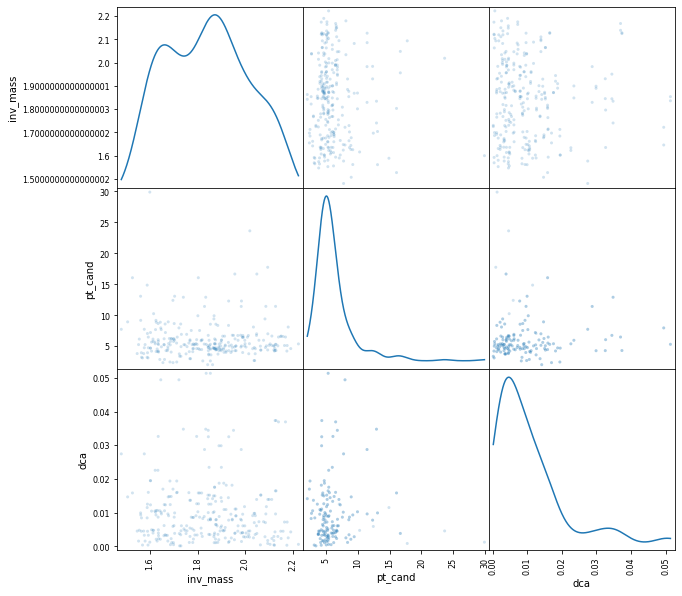

In [53]:
scatter_matrix(d0_df_cuts[['inv_mass', 'pt_cand', 'dca']], alpha=0.2, figsize=(10, 10), diagonal='kde')

(array([2., 1., 3., 4., 3., 3., 1., 3., 3., 3., 1., 3., 2., 1., 2., 6., 4.,
        6., 1., 6., 7., 5., 2., 4., 5., 3., 3., 3., 2., 2., 3., 2., 3., 1.,
        4., 3., 2., 0., 3., 6., 1., 3., 1., 2., 3., 0., 1., 3., 3., 3.]),
 array([1.75 , 1.756, 1.762, 1.768, 1.774, 1.78 , 1.786, 1.792, 1.798,
        1.804, 1.81 , 1.816, 1.822, 1.828, 1.834, 1.84 , 1.846, 1.852,
        1.858, 1.864, 1.87 , 1.876, 1.882, 1.888, 1.894, 1.9  , 1.906,
        1.912, 1.918, 1.924, 1.93 , 1.936, 1.942, 1.948, 1.954, 1.96 ,
        1.966, 1.972, 1.978, 1.984, 1.99 , 1.996, 2.002, 2.008, 2.014,
        2.02 , 2.026, 2.032, 2.038, 2.044, 2.05 ], dtype=float32),
 <a list of 50 Patch objects>)

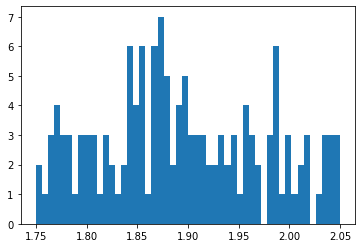

In [54]:
plt.hist(d0_df_cuts['inv_mass'], bins=50, range=(1.75, 2.05))